In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

In [3]:
spy['Date']

0       2019-04-15
1       2019-04-16
2       2019-04-17
3       2019-04-18
4       2019-04-22
           ...    
1253    2024-04-08
1254    2024-04-09
1255    2024-04-10
1256    2024-04-11
1257    2024-04-12
Name: Date, Length: 1258, dtype: object

## Data preprocessing

### Convert column name to perspective column name

In [4]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677


In [27]:
#Check for any missing data
print(btc.isna().sum())
print(eth.isna().sum())
print(spy.isna().sum())

Date            0
btcOpen         0
btcHigh         0
btcLow          0
btcClose        0
btcAdj Close    0
btcVolume       0
dtype: int64
Date            0
ethOpen         0
ethHigh         0
ethLow          0
ethClose        0
ethAdj Close    0
ethVolume       0
dtype: int64
Date            0
spyOpen         0
spyHigh         0
spyLow          0
spyClose        0
spyAdj Close    0
spyVolume       0
dtype: int64


In [6]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [7]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [8]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677
5,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918
6,2019-04-19,5298.154297,5336.680176,5233.334961,5303.812500,5303.812500,13780238655
7,2019-04-20,5304.160645,5358.490723,5295.877930,5337.886230,5337.886230,13169647522
8,2019-04-21,5335.878906,5359.924805,5257.339355,5314.531250,5314.531250,13731844223
9,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,14601631648


In [10]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [11]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

https://realpython.com/pandas-merge-join-and-concat/

In [12]:
df = pd.merge(btc, eth, on = ["Date"])

In [13]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2019-04-13,5088.850098,5127.122070,5061.589355,5096.586426,5096.586426,10823289598,164.622849,166.362427,163.011856,164.513351,164.513351,4959301561
1,2019-04-14,5095.758789,5184.016113,5053.568359,5167.722168,5167.722168,10391952498,164.476089,168.591034,162.781479,167.838516,167.838516,4846298303
2,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824
3,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341
4,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715


In [14]:
df = pd.merge(df, spy, on = ['Date'])

In [15]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2019-04-15,5167.321777,5196.606934,5024.069336,5067.108398,5067.108398,12290155061,167.897476,168.818451,159.555740,161.574173,161.574173,5672311824,290.239990,290.350006,289.079987,289.970001,267.572266,49596700
1,2019-04-16,5066.577637,5238.945313,5055.194824,5235.559570,5235.559570,11618660197,161.526550,167.666321,160.888748,167.623444,167.623444,5180105341,290.950012,291.010010,289.500000,290.160004,267.747620,52153200
2,2019-04-17,5236.135254,5274.275391,5219.205566,5251.937988,5251.937988,12438480677,167.553696,168.938583,165.501892,166.950760,166.950760,5596102715,291.399994,291.429993,288.989990,289.450012,267.092377,58268300
3,2019-04-18,5251.480469,5319.986328,5250.506836,5298.385742,5298.385742,13256489918,166.913208,175.365326,166.672119,173.814026,173.814026,6971581464,290.100006,290.320007,288.660004,290.019989,267.618439,68708500
4,2019-04-22,5312.494629,5422.687500,5280.276855,5399.365234,5399.365234,14601631648,170.017487,173.069122,168.729553,171.874664,171.874664,6094878077,289.170013,290.440002,289.070007,290.269989,267.849091,40160100


In [16]:
btc.shape

(1828, 7)

In [17]:
spy.shape

(1258, 7)

In [18]:
df.shape

(1258, 19)

In [28]:
df.shape

(1258, 20)

In [ ]:
#Split the data for predicting High

In [35]:
import random

x_train = df
y = df['btcHigh']
header = x_train.columns

# remove header for shuffling 
x_data = x_train.values

random.seed(123)
#Split 70% for train data, and 30% for test data
train_ratio = 0.7
test_ratio = 1 - train_ratio

total_data_sample = len(x_train)
train_samples = int(total_data_sample * train_ratio)
test_samples = total_data_sample - train_samples

#print(X)
random.shuffle(x_data)
shuffled_data = pd.DataFrame(x_data, columns=header)

train_data = shuffled_data.head(train_samples)
test_data = shuffled_data.head(test_samples)

# Split the data into training sets for btc high
X_train_btcHigh = train_data.drop(columns=['btcHigh'])
y_train_btcHigh = train_data['btcHigh']

# Split the data into training sets for btc high
X_test_btcHigh = test_data.drop(columns=['btcHigh'])
y_test_btcHigh = test_data['btcHigh']

In [42]:
X_test_btcHigh

,Date,btcOpen,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume,DATE
0,2019-04-15,0.00242,0.013642,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
1,2019-04-15,0.00242,0.013642,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
2,2019-04-15,0.00242,0.013642,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
3,2019-04-17,0.003431,0.016544,0.004128,0.004128,0.008916,0.01216,0.011081,0.015211,0.011984,0.011984,0.027648,0.213807,0.209372,0.232267,0.221504,0.182481,0.10216,2019-04-17
4,2019-04-22,0.004552,0.017453,0.006292,0.006292,0.015249,0.012684,0.011945,0.015909,0.013032,0.013032,0.033796,0.206264,0.206015,0.23253,0.224236,0.184896,0.053475,2019-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2020-09-14,0.078237,0.091615,0.083832,0.083832,0.076296,0.054321,0.056215,0.056758,0.056719,0.056719,0.174827,0.369706,0.375343,0.380796,0.384751,0.351708,0.121886,2020-09-14
374,2019-12-12,0.032524,0.045484,0.033362,0.033362,0.027912,0.007066,0.006225,0.010005,0.007444,0.007444,0.055927,0.291706,0.299427,0.314955,0.313703,0.272902,0.20465,2019-12-12
375,2019-10-01,0.048433,0.06137,0.049513,0.049513,0.017309,0.014853,0.014453,0.017441,0.014194,0.014194,0.053288,0.235252,0.233208,0.245435,0.234128,0.201856,0.182746,2019-10-01
376,2019-12-27,0.032839,0.045859,0.034051,0.034051,0.039185,0.003396,0.002529,0.006411,0.003533,0.003533,0.060968,0.323197,0.319127,0.341587,0.332789,0.294663,0.059843,2019-12-27


In [36]:
#Split the data for prediciting Low

In [37]:
x_train = df
y = df['btcLow']
header = x_train.columns

# remove header for shuffling 
x_data = x_train.values

random.seed(123)
#Split 70% for train data, and 30% for test data
train_ratio = 0.7
test_ratio = 1 - train_ratio

total_data_sample = len(x_train)
train_samples = int(total_data_sample * train_ratio)
test_samples = total_data_sample - train_samples

#print(X)
random.shuffle(x_data)
shuffled_data = pd.DataFrame(x_data, columns=header)

train_data = shuffled_data.head(train_samples)
test_data = shuffled_data.head(test_samples)

# Split the data into training sets for btc low
X_train_btcLow = train_data.drop(columns=['btcLow'])
y_train_btcLow = train_data['btcLow']

# Split the data iinto training sets for btc low
X_test_btcLow = test_data.drop(columns=['btcLow'])
y_test_btcLow = test_data['btcLow']

In [41]:

X_train_btcLow.head(10)

,Date,btcOpen,btcHigh,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume,DATE
0,2019-04-15,0.00242,0.0,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
1,2019-04-15,0.00242,0.0,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
2,2019-04-15,0.00242,0.0,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
3,2019-04-17,0.003431,0.001133,0.004128,0.004128,0.008916,0.01216,0.011081,0.015211,0.011984,0.011984,0.027648,0.213807,0.209372,0.232267,0.221504,0.182481,0.10216,2019-04-17
4,2019-04-22,0.004552,0.003298,0.006292,0.006292,0.015249,0.012684,0.011945,0.015909,0.013032,0.013032,0.033796,0.206264,0.206015,0.23253,0.224236,0.184896,0.053475,2019-04-22
5,2019-04-22,0.004552,0.003298,0.006292,0.006292,0.015249,0.012684,0.011945,0.015909,0.013032,0.013032,0.033796,0.206264,0.206015,0.23253,0.224236,0.184896,0.053475,2019-04-22
6,2019-04-15,0.00242,0.0,0.001414,0.001414,0.008482,0.012233,0.011055,0.013925,0.010841,0.010841,0.028587,0.209884,0.20571,0.232563,0.223236,0.184013,0.078846,2019-04-15
7,2019-04-25,0.006815,0.005042,0.00352,0.00352,0.017382,0.011811,0.010573,0.01269,0.009328,0.009328,0.042738,0.216243,0.213949,0.237981,0.230165,0.19014,0.100822,2019-04-25
8,2019-04-16,0.00094,0.000618,0.003887,0.003887,0.006516,0.010877,0.010814,0.014213,0.012128,0.012128,0.02252,0.212285,0.207948,0.233942,0.223869,0.184573,0.085719,2019-04-16
9,2019-04-18,0.003656,0.0018,0.00481,0.00481,0.011311,0.012024,0.012426,0.015464,0.013444,0.013444,0.044602,0.20941,0.205608,0.231184,0.223403,0.18416,0.130228,2019-04-18


When merged, around 600 or 30% of data got lost

## Graph

In [19]:
df['DATE'] = pd.to_datetime(df['Date'])

<Axes: xlabel='DATE', ylabel='ethOpen'>

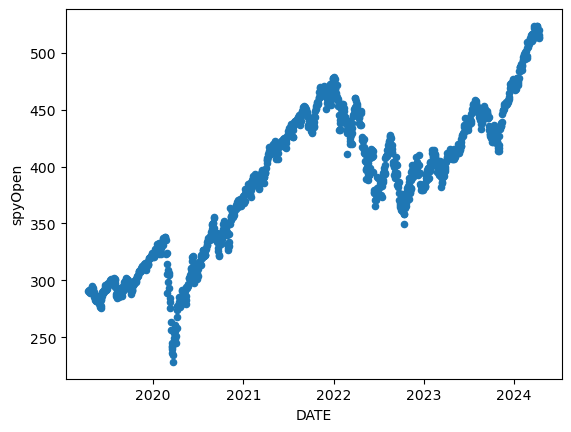

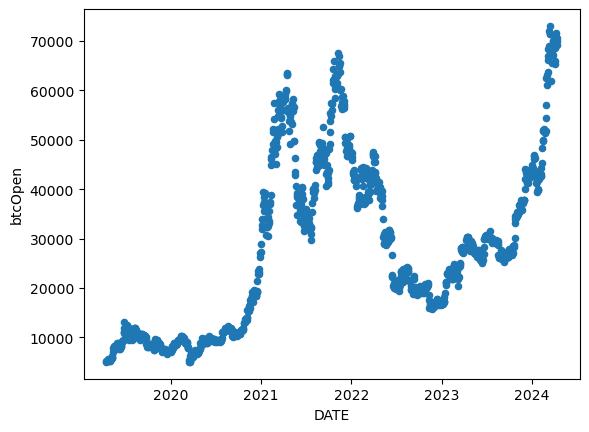

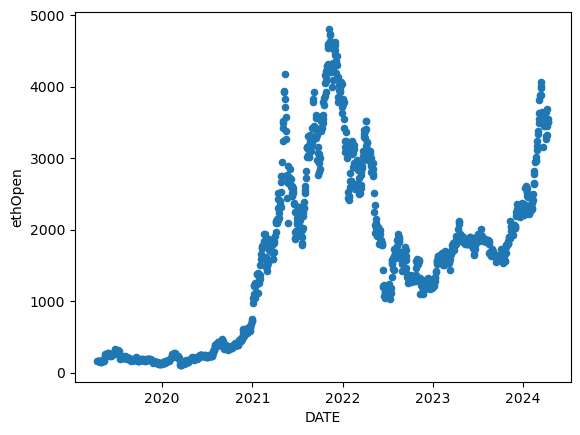

In [20]:
df.plot(x = 'DATE', y = 'spyOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'btcOpen', kind = 'scatter')
df.plot(x = 'DATE', y = 'ethOpen', kind = 'scatter')

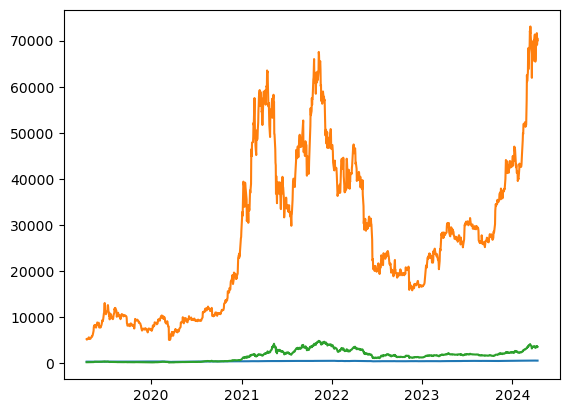

In [21]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()

Emphasize the need to normalization data, otherwise we cannot compare them

# Normalize data

In [22]:
des = df.describe()

In [23]:
exception = ['Date', 'DATE']

In [24]:
for col in df.columns:
    if col not in exception:
        df[col] = (df[col] - des[col]['min']) / (des[col]['max'] - des[col]['min'])

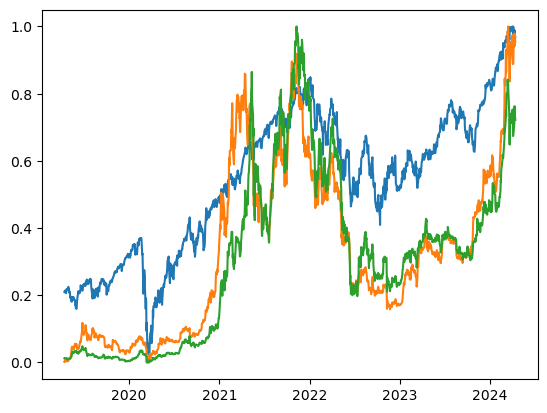

In [25]:
plt.plot(df['DATE'], df['spyOpen'], label = 'Spy Open')
plt.plot(df['DATE'], df['btcOpen'], label = 'Bitcoin Open')
plt.plot(df['DATE'], df['ethOpen'], label = 'Ethererum Open')
plt.show()